# Deep Learning 2019
## Assignment 2 - Neural Networks and Loss Functions
Please complete the questions below by modifying this notebook and send this file via e-mail to

__[pir-assignments@l3s.de](mailto:pir-assignments@l3s.de?subject=[DL-2019]%20Assignment%20X%20[Name]%20[Mat.%20No.]&)__

using the subject __[DL-2019] Assignment X [Name] [Mat. No.]__. The deadline for this assignment is __May 7th, 2019, 9AM__.

Programming assignments have to be completed using Python 3. __Please do not use Python 2.__

__Always explain your answers__ (do not just write 'yes' or 'no').

Please add your name and matriculation number below:

__Name:__
<br>
__Mat. No.:__

----

### 1. Multilayer Perceptron

Consider an MLP with $n > 0$ hidden layers $h_1, h_2, ..., h_n$. Let all activation functions in this network be __linear__, i.e. all neurons use the activation function $f(x) = x$. Show that this model is a __linear predictor__, i.e. there exists an equivalent MLP with no hidden layers (only input and output layer).

### 2. Learning XOR
The XOR function is defined as
\begin{equation}
    x_1 \oplus x_2 =
    \begin{cases}
        0 \quad x_1 = x_2\\
        1 \quad x_1 \neq x_2\\
    \end{cases}.
\end{equation}

In this task we want to use `scikit-learn` to train a linear classifier to learn the XOR function.

1. What are the possible input-output-pairs $(x, y)$?
2. Use `sklearn.linear_model.LinearRegression` to train a linear classifier on all pairs from 1.
3. Test your classifier. Is it working well? Why (not)?


1. The possible input-output-pairs are :

| X1   | X1   | XOR |
|------|------|-----|
|   0  | 0    | 0   |
|   1  | 0    | 1   |
|   0  | 1    | 1   |
|   0  | 0    | 0   |



In [43]:
#Building a linear classifier 
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0],[1],[1],[0]])
model=LinearRegression().fit(X,y)

In [54]:
# Testing the performance of classifier
print("Score: ",model.score(X,y))
print(model.predict(np.array([[0,1]])))
print(model.predict(np.array([[0,0]])))
print(model.predict(np.array([[1,0]])))
print(model.predict(np.array([[1,1]])))

Score:  1.1102230246251565e-16
[[0.5]]
[[0.5]]
[[0.5]]
[[0.5]]


### 3. Learning XOR with MLP
For this task, __the only library allowed is numpy__. Specifically, do not use a deep learning library.

We now want to implement a simple feed-forward net that can learn the XOR function. Our network should have a single $3$-dimensional hidden layer $h$ and use sigmoid activation in all layers.

1. What are the dimensions of the two weight matrices? 
(3,1) 
(2,1)
2. Implement the forward pass. Initialize the weight matrices randomly in $[-1; 1]$. You can omit the bias terms in this example.
3. Implement the backward pass. Use SGD optimization and $L_2$ (mean squared error) loss. Set the learning rate to $\eta = 1$.
4. Train and test your model.

In [245]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)


# Input Data
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([[0], [1], [1], [0]])

# NN Architecture
input_neurons = 2
hidden_layer_neurons = 2
output_neurons = 1

# Parameters
learning_rate = 0.1
epochs = 100000

# Random weights and bias initialization
hidden_layer_weights = np.random.normal(0,1,size=(input_neurons, hidden_layer_neurons))
hidden_layer_bias = np.random.normal(0,1,size=(1, hidden_layer_neurons))
output_layer_weights = np.random.normal(0,1,size=(hidden_layer_neurons, output_neurons))
output_layer_bias = np.random.normal(0,1,size=(1, output_neurons))

# Training algorithm
for _ in range(epochs):
    # Forward Propagation
    activation_hidden_layer = np.dot(input_data, hidden_layer_weights)
    activation_hidden_layer += hidden_layer_bias
    hidden_layer_output = sigmoid(activation_hidden_layer)

    activation_output_layer = np.dot(hidden_layer_output, output_layer_weights)
    activation_output_layer += output_layer_bias
    predicted_output = sigmoid(activation_output_layer)
    
    # Backpropagation
    error = labels - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(output_layer_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating Weights and Biases
    output_layer_weights += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    output_layer_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    hidden_layer_weights += input_data.T.dot(d_hidden_layer) * learning_rate
    hidden_layer_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

print('Weights of Hidden Layer :')
print(hidden_layer_weights)
print('Hidden bias: ')
print(hidden_layer_bias)
print('Weights of Output Layer :')
print(output_layer_weights)
print('Bias of Output Layer :')
print(output_layer_bias)

print('Output from neural network after', epochs, 'epochs:')
print(predicted_output)


Weights of Hidden Layer :
[[0.15336682 0.61623107]
 [0.28622372 0.35679242]]
Hidden bias: 
[[-1.21109297 -0.38312355]]
Weights of Output Layer :
[[-1.72510951]
 [ 0.00996463]]
Bias of Output Layer :
[[0.64021042]]
Weights of Hidden Layer :
[[5.15462579 6.40520735]
 [5.15429068 6.4042762 ]]
Hidden bias: 
[[-7.89991762 -2.8643183 ]]
Weights of Output Layer :
[[-10.77241478]
 [ 10.30075436]]
Bias of Output Layer :
[[-4.87700605]]
Output from neural network after 100000 epochs:
[[0.01305672]
 [0.9888307 ]
 [0.98883134]
 [0.01142401]]


## 4. Feed-forward Network with `scikit-learn`
In this problem, we are going to learn how to train a feed-forward neural network with the `sklearn.neural_network` module in `scikit-learn`. We will train an `sklearn.neural_network.MLPClassifier` on the [__Iris dataset__](https://en.wikipedia.org/wiki/Iris_flower_data_set) to classify flowers.

1. Load the Iris dataset and split it into 90% for training and 10% for testing using the `train_test_split` function. Then train an `MLPClassifier` with __3 hidden layers__ on the training data after necessary preprocessing. During training, perform validation and enable the `early_stopping` functionality based on validation data by setting `validation_fraction` to $0.1$. Furthermore, the model should use an __L2 penalty__ to avoid overfitting. Evaluate your model on the test data.

2. Choose a proper metric and draw the learning curve (`sklearn.model_selection.learning_curve`) of this model using a $5$-fold cross validation split. Compute the variance across different iterations for different sizes of training data. What is the downside of setting aside a single validation set __statically__, like in the first problem, compared with the $5$-fold cross validation method?

3. As you might have noticed from the data, the distribution of the label classes is not uniform, which means, while sampling validation data from the whole set, it is possible to sample a set in a different distribution. What kind of problems can this cause? How can you deal with this situation?

$^1$ The `MLPClassifier` module is quite limited in terms of customizability. For instance, [custom loss functions are not supported due to performance reasons](https://github.com/scikit-learn/scikit-learn/issues/1701). Starting from the next assignment, we will use actual deep learning libraries.

In [266]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
#Split data
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)

#Build the MLP Classifier
nn_model = MLPClassifier(hidden_layer_sizes=(128,64,32),activation='relu', alpha=1e-5, max_iter=100, verbose=10, solver='sgd',
                    learning_rate_init=.1, early_stopping=True)


#train the model
nn_model.fit(X_train,y_train)
print("Validation Set Score: ",nn_model.score(X_test,y_test))


Iteration 1, loss = 1.39806062
Validation score: 0.214286
Iteration 2, loss = 3.03144046
Validation score: 0.785714
Iteration 3, loss = 2.22688569
Validation score: 0.428571
Iteration 4, loss = 1.12599855
Validation score: 0.785714
Iteration 5, loss = 0.99949003
Validation score: 0.571429
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Validation Set Score:  0.6


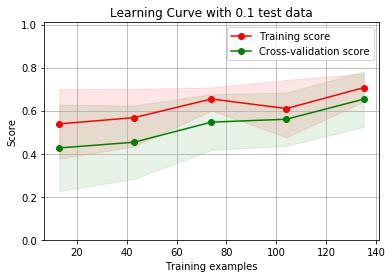

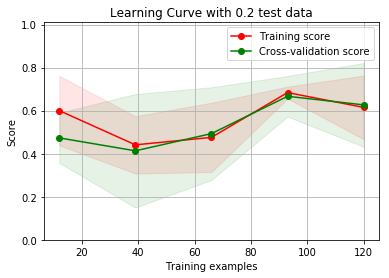

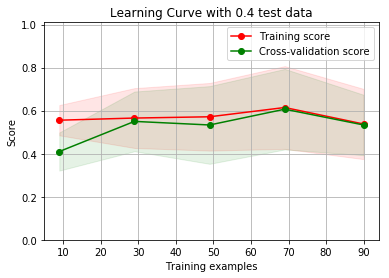

In [264]:
#Plot learning curve for 5-folds with different sizes of training data

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import explained_variance_score

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



iris_data = load_iris()
X=iris_data.data
y=iris_data.target


estimator = nn_model


_test_size=0.1
_title="Learning Curve with "+ str(_test_size) +" test data"
cv = ShuffleSplit(n_splits=5, test_size=_test_size, random_state=0)
plot_learning_curve(estimator, _title, X, y, ylim=(0.0, 1.01), cv=cv, n_jobs=4)
plt.show()


_test_size=0.2
_title="Learning Curve with "+ str(_test_size) +" test data"
cv = ShuffleSplit(n_splits=5, test_size=_test_size, random_state=0)
plot_learning_curve(estimator, _title, X, y, ylim=(0.0, 1.01), cv=cv, n_jobs=4)
plt.show()

_test_size=0.4
_title="Learning Curve with "+ str(_test_size) +" test data"
cv = ShuffleSplit(n_splits=5, test_size=_test_size, random_state=0)
plot_learning_curve(estimator, _title, X, y, ylim=(0.0, 1.01), cv=cv, n_jobs=4)
plt.show()

In [287]:
# Compute the with variance of the model with different iterations and sizes of training data

from sklearn.metrics import explained_variance_score
import numpy as np

_test_size=0.1

for i in range(5):
    _max_iterations=np.random.randint(10,100)
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=_test_size, random_state=42)
    nn_model = MLPClassifier(hidden_layer_sizes=(128,64,32),activation='relu', alpha=1e-5, max_iter=_max_iterations, solver='sgd',
                    learning_rate_init=.1, early_stopping=False)
    nn_model.fit(X_train,y_train)
    print("Max Iterations:",_max_iterations,", ", "Validation Set Score: ",round(nn_model.score(X_test,y_test),4))
    y_predicted=nn_model.predict(X_test)
    print("Variance for {0:.2f} training data :".format(1- _test_size), round(explained_variance_score(y_test, y_predicted),4)) 
    _test_size+=0.2
    

Max Iterations: 15 ,  Validation Set Score:  0.4
Variance for 0.90 training data : 0.0
Max Iterations: 98 ,  Validation Set Score:  0.2826
Variance for 0.70 training data : 0.0
Max Iterations: 82 ,  Validation Set Score:  0.6933
Variance for 0.50 training data : 0.6905
Max Iterations: 30 ,  Validation Set Score:  0.2762
Variance for 0.30 training data : -0.1313
Max Iterations: 51 ,  Validation Set Score:  0.3185
Variance for 0.10 training data : 0.6773


2.The downside a single validation set is that the data might not be uniformly distributed over training and validation sets.
In 5-fold cross validation method each split is 4 times training set and one time validation set, which enable the model to be trained fairly on the whole data distribution. 


3.What kind of problems can this can cause underfitting problem, since the model is trained on different data distribution. 
As a solution for this problem we can apply the following techniques:
        1. Shuffle the data.
        2. split the data into three datasets : train/dev/tests , the role of dev set is to control the parameters of 
        the model and assure the it learn correctly 